Create a Data Cleaning and Processing system to enhance data quality and usability. Utilize techniques like outlier detection, missing value imputation, and normalization for preprocessing raw data. Implement automation for efficient handling of large datasets. Ensure compatibility with various data formats and structures. Include error handling mechanisms to maintain data integrity. Provide options for data validation and visualization to assist in quality control. Prioritize scalability and performance for handling diverse data sources effectively.

In [46]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#data loading and reading
df=pd.read_csv("C:\\Users\\lenovo\\Downloads\\titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape

(891, 12)

In [27]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   820.000000  820.000000  820.000000  820.000000  820.000000   
mean    445.719512    0.390244    2.310976   29.444720    0.348780   
std     255.213085    0.488103    0.826678   12.173461    0.619434   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     226.750000    0.000000    2.000000   23.000000    0.000000   
50%     446.500000    0.000000    3.000000   28.000000    0.000000   
75%     661.250000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   66.000000    3.000000   

            Parch        Fare  
count  820.000000  820.000000  
mean     0.254878   25.836051  
std      0.565308   29.817529  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   13.000000  
75%      0.000000   27.000000  
max      2.000000  164.866700  


In [7]:
#identify missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
df['Age'].fillna(df['Age'].mean(), inplace=True)   #With mean
df['Embarked'].fillna('S', inplace=True)

In [30]:
# Fill missing Age values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

In [31]:
# Fill missing Embarked values with the mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [32]:
# Verify that there are no more missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          609
Embarked         0
dtype: int64


In [33]:
# Convert 'Sex' and 'Embarked' columns to categorical data types
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

In [34]:
#identify duplicates values
df.duplicated().sum()

0

In [49]:
#Outlier detection
outlier_detector = IsolationForest(contamination=0.1)
outliers = outlier_detector.fit_predict(df[['Age', 'Fare']])
df['Outlier'] = outliers


In [38]:
# Normalize data
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [39]:
# Data Validation Module
# Check for invalid values
invalid_values = df[(df['Age'] < 0) | (df['Fare'] < 0)]
if not invalid_values.empty:
    print("Invalid values found:")
    print(invalid_values)

Invalid values found:
     PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
2              3         1       3                    Heikkinen, Miss. Laina   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex      

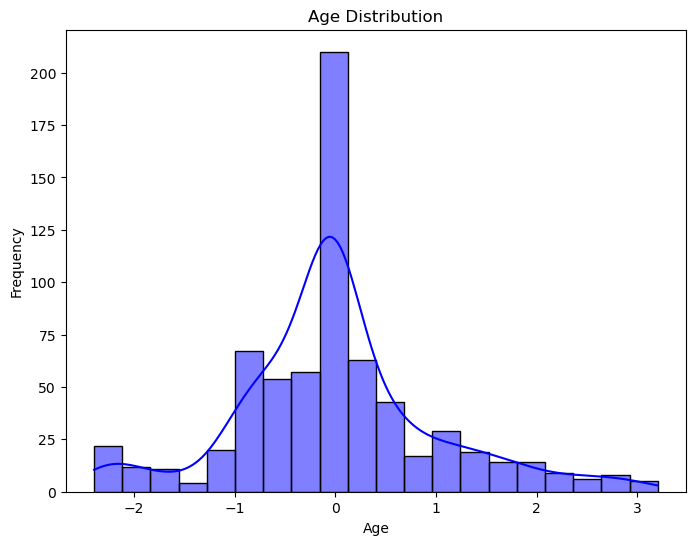

In [51]:
# Data Visualization
# Histogram of Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

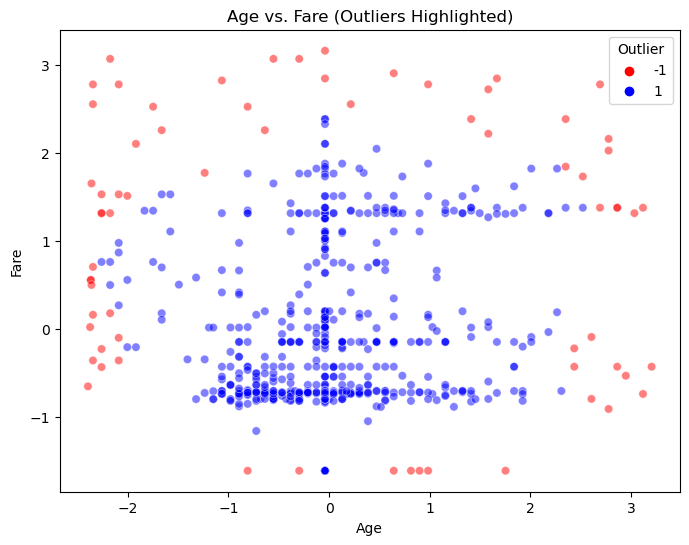

In [52]:
# Scatter plot of Age vs. Fare with outliers highlighted
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', data=df, hue='Outlier', palette={-1: 'red', 1: 'blue'}, alpha=0.5)
plt.title('Age vs. Fare (Outliers Highlighted)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [54]:
#Save processed data
df.to_csv('processed_titanic.csv', index=False)